# Auswertungshilfe

Im Folgenden finden Sie Rezepte und kurze Anleitungen, die Ihnen bei der Auswertung der Daten helfen sollen. Sie können jedes beliebige Tool für die Auswertung verwenden, solange Sie zu einem brauchbaren Ergebnis kommen. Stark empfohlen wird die Verwendung von Python-Skripten.


## 1. Einlesen und Korrektur

Korrektur der Aufnahmen mittels der gewonnenen Bias-, Dark- und Flat-Aufnahmen (siehe bereitgestelltes PDF in Moodle). Hierfür können Python-Funktionen verwendet werden. Beispiele von einfachen Operationen, siehe auch die [Astropy Dokumentation](https://docs.astropy.org/en/stable/io/fits/).

Bias, Dark und Flat Korrektur werden an die Science Frames wie folgt angewandt:

$$
\mathrm{science frame} = \frac{\mathrm{raw science frame}- \mathrm{master dark} - \mathrm{master bias}}{\mathrm{master flat} /  \langle\mathrm{master flat}\rangle }
$$

In [45]:
# Einlesen eines FITS-Bildes mit Header, Header enthält Metadata, Data als Matrix gespeichert
################################
#import numpy as np
#from astropy.io import fits
#data, header = fits.getdata("/path/to/file.fits", header=True)

# Korrektur mittels Biasframe (Subtraktion)
#data = fits.getdata("/path/to/file.fits")
#bias = fits.getdata("/path/to/bias.fits")
#data_minus_bias = data - bias
###

#ist nur fürs einzelne einlesen

# ich denke hier müss ma: 
# Erstellung einer Wellenlängenkalibration mit dem Th-Ar Spektrum (2 Punkte)
# Erstellung eines wellenlängenkalibrierten Sonnenspektrums (1 Punkte)
# Identifikation prominenter Linien im Sonnenspektrum und Vergleich des Sonnen-spektrums mit der Literatur (3 Punkte)

C:\Users\raffi\AppData\Local\Temp\ipykernel_5152\1727364392.py:52: RuntimeWarning: All-NaN slice encountered
  spectrum_thar = np.nanmedian(data_cutout_thar, axis=0) #sums up all values in a column I think and then calculates the mean


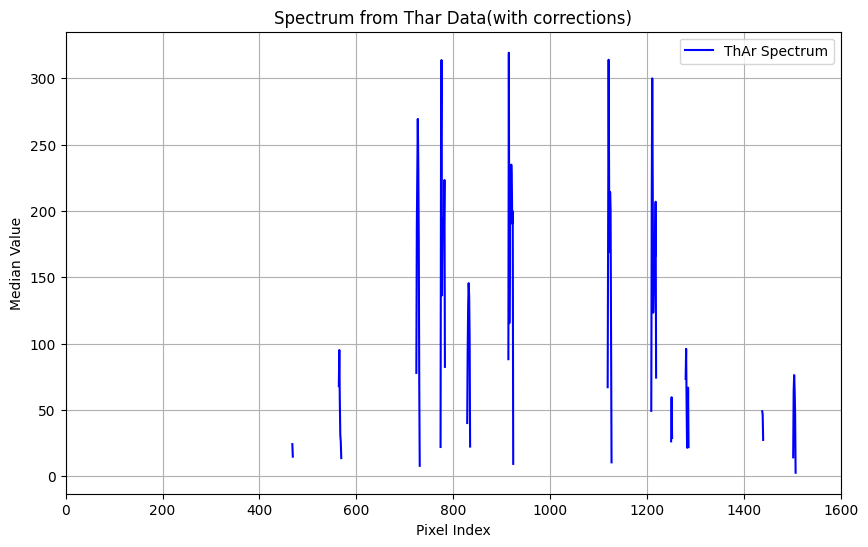

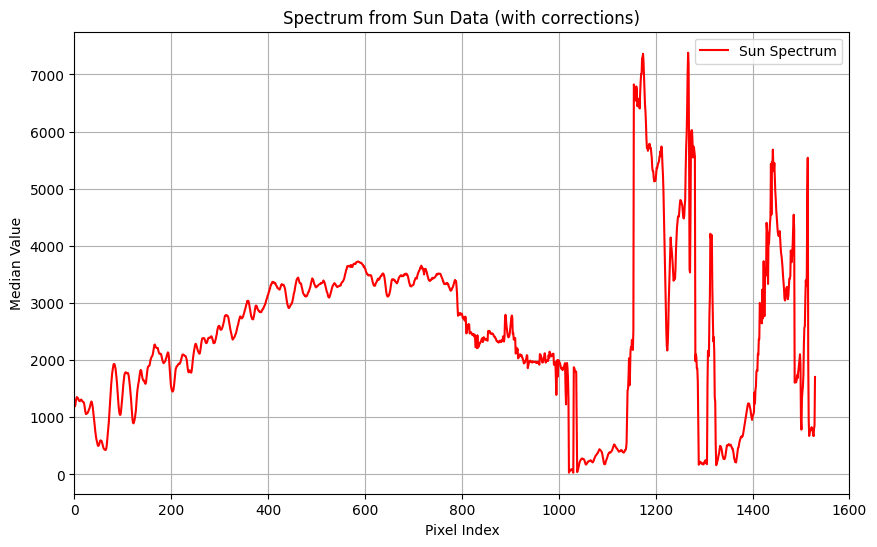

In [ ]:
#Ploten der spektren von sonne und ThAr lampe mit korrektur mithilfe von flat fit, dark fit, bias fit
#x axis wiss ma noch nicht da wir quasi schauen müssen wo die thar lampe diese peaks hat um zu sehen was das für ne wellenlänge is



# Finden von FITS-Bildern und Einlesen mittels List Comprehension. liest alle fit datein ein
from glob import glob
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
np.set_printoptions(threshold=10000000)#too many elements otherwise ipynb shows ....
#hier haben wir jetzt alle verschiedenen datenfiles in den verschiedenen data lists.
pathsbias_images = sorted(glob(r"C:\Users\raffi\Desktop\Praktikum-main\gruppe6*bias.fit"))
biasdata_images = [fits.getdata(path) for path in pathsbias_images]
pathsdark_images = sorted(glob(r"C:\Users\raffi\Desktop\Praktikum-main\gruppe6*dark.fit"))
darkdata_images = [fits.getdata(path) for path in pathsdark_images]
pathsflat_images = sorted(glob(r"C:\Users\raffi\Desktop\Praktikum-main\gruppe6*flat.fit"))
flatdata_images = [fits.getdata(path) for path in pathsflat_images]
pathsThAr_images = sorted(glob(r"C:\Users\raffi\Desktop\Praktikum-main\gruppe6*ThAr.fit"))
ThArdata_images = [fits.getdata(path) for path in pathsThAr_images]
pathsfilter_images = sorted(glob(r"C:\Users\raffi\Desktop\Praktikum-main\gruppe6-0001_filter*fit"))
filterdata_images = [fits.getdata(path) for path in pathsfilter_images]
#print(len(biasdata_images)) #5
#print(len(darkdata_images)) #5
#print(len(flatdata_images) )#5
#print(len(ThArdata_images)) #5
#print(len(filterdata_images)) #2

#avg values per pixel von den daten
avg_values_thar= sum(ThArdata_images[:5]) / 5
avg_values_flat= sum(flatdata_images[:5]) / 5
avg_values_dark= sum(darkdata_images[:5]) / 5
avg_values_bias= sum(biasdata_images[:5]) / 5
avg_flat=np.mean(avg_values_flat)
#test ob sum passt, vom ersten pixel zumindest
#print(ThArdata_images[0][0][0])
#print(ThArdata_images[1][0][0])
#print(ThArdata_images[2][0][0])
#print(ThArdata_images[3][0][0])
#print(ThArdata_images[4][0][0])

#correctur
values_corrected=avg_values_thar-avg_values_bias-avg_values_dark
values_flat_corrected=values_corrected/(avg_values_flat/avg_flat)

#test ob das corrected value passt
#print(avg_values_thar[0][0])
#print(avg_values_bias[0][0])
#print(avg_values_thar[0][0]-avg_values_bias[0][0])
#print(values_bias_corrected[0])

indices_non_negative_rows = np.where(np.any(values_flat_corrected >= 0, axis=1))[0] #bekommen dadurch die zeilen wo zumindest ein wert nicht negative ist

#print(indices_non_negative_rows) 337 till 395 should be thar lamp  and 478 till 579 should be sun
data_cutout_thar = values_flat_corrected[337:395]
data_cutout_thar[data_cutout_thar < 0] = np.nan #sets all values that are negative in the row to nan so that they wont be summed up later
spectrum_thar = np.nanmedian(data_cutout_thar, axis=0) #sums up all values in a column I think and then calculates the mean 

x_values = np.arange(len(spectrum_thar))  # If columns represent pixels

# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(x_values, spectrum_thar, label='ThAr Spectrum', color='blue')  # Plot the spectrum
plt.xlabel('Pixel Index')  # Label for the x-axis
plt.ylabel('Median Value')  # Label for the y-axis
plt.xlim(0, 1600)
plt.title('Spectrum from Thar Data(with corrections)')  # Title of the plot
plt.legend()  # Show the legend
plt.grid()  # Optional: Add a grid for better readability
plt.show()
#should be the data of sun 
data_cutout_sun = values_flat_corrected[478:579]
data_cutout_sun[data_cutout_sun < 0] = np.nan
spectrum_sun = np.nanmedian(data_cutout_sun, axis=0)

plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(x_values, spectrum_sun, label='Sun Spectrum', color='red')  # Plot the spectrum
plt.xlabel('Pixel Index')  # Label for the x-axis
plt.ylabel('Median Value')  # Label for the y-axis
plt.xlim(0, 1600)
plt.title('Spectrum from Sun Data (with corrections)')  # Title of the plot
plt.legend()  # Show the legend
plt.grid()  # Optional: Add a grid for better readability
plt.show()

np.set_printoptions(threshold=1000)


# Vergleich des Sonnenspektrums bei verschiedenen Reduktionsschritten (kein Flat-
# field, nur Flatfield mit Glühbirne, Flatfield korrigiert mit dem Silver-Nova Spektrographen) (2 Punkte)

# tbh no clue unterschied zwischen flatfield glühbirne ? (ist das unsere flatfield daten die wir in den fits haben?) 
# und dem flatfield korregiert mit dem Silver-Nova Spektrographen. ist das das Spektrum.SSM file?? weiter unten dargestellt die daten )

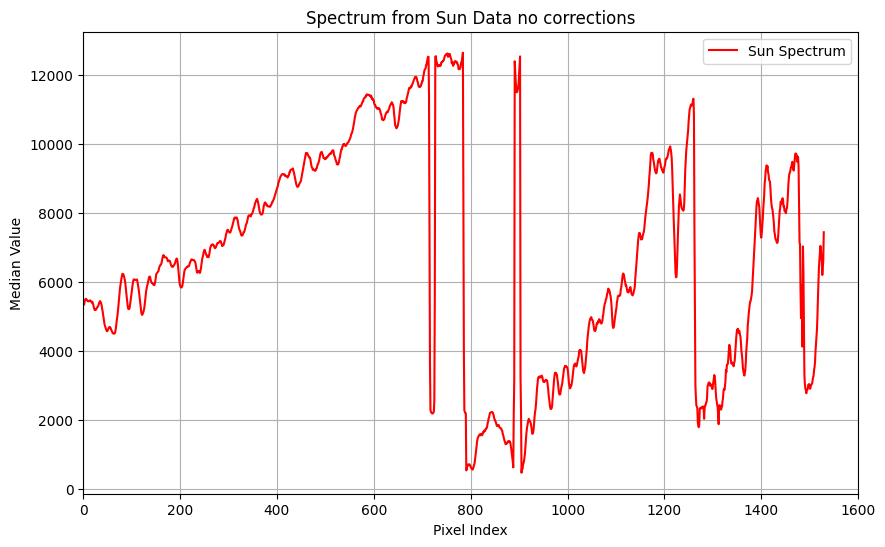

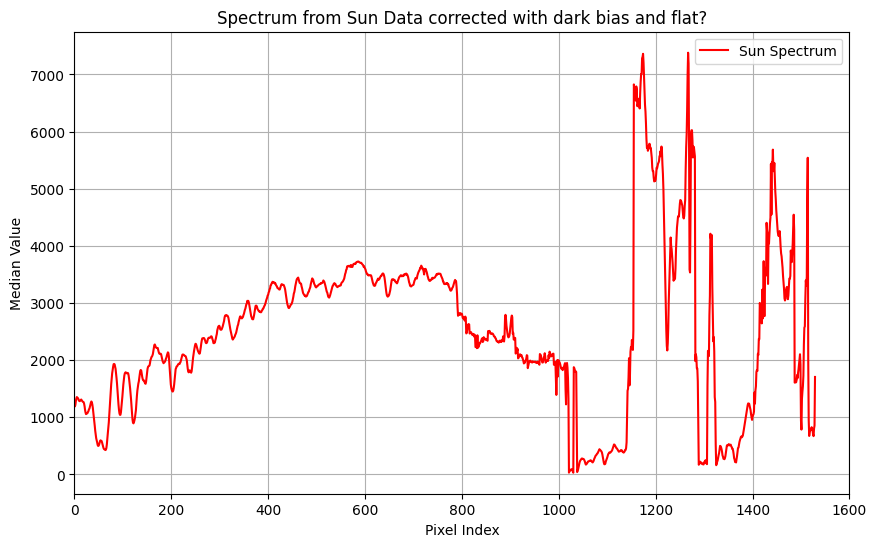

In [ ]:
#tbh no clue unterschied zwischen flatfield glühbirne ? (ist das unsere flatfield daten die wir in den fits haben?) 
# und dem flatfield korregiert mit dem Silver-Nova Spektrographen. ist das das Spektrum.SSM file?? weiter unten dargestellt die daten )






sun_notcorrected=avg_values_thar[478:579]
sun_notcorrected[sun_notcorrected < 0] = np.nan
spectrum_sun_not_corrected = np.nanmedian(sun_notcorrected, axis=0)

plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(x_values, spectrum_sun_not_corrected, label='Sun Spectrum', color='red')  # Plot the spectrum
plt.xlabel('Pixel Index')  # Label for the x-axis
plt.ylabel('Median Value')  # Label for the y-axis
plt.xlim(0, 1600)
plt.title('Spectrum from Sun Data no corrections')  # Title of the plot
plt.legend()  # Show the legend
plt.grid()  # Optional: Add a grid for better readability
plt.show()


plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(x_values, spectrum_sun, label='Sun Spectrum', color='red')  # Plot the spectrum
plt.xlabel('Pixel Index')  # Label for the x-axis
plt.ylabel('Median Value')  # Label for the y-axis
plt.xlim(0, 1600)
plt.title('Spectrum from Sun Data corrected with dark bias and flat?')  # Title of the plot
plt.legend()  # Show the legend
plt.grid()  # Optional: Add a grid for better readability
plt.show()


np.set_printoptions(threshold=1000)


# filter data: nicht sicher ob ich einfach die flat ding wieder drauf hau??

# aufgabenstellung hier:
# Identifikation des Typs der astrophysikalisch definierten Filter und Berechnung der
# effektiven Wellenlänge und Halbwertsbreite. (3 Punkte)

C:\Users\raffi\AppData\Local\Temp\ipykernel_5152\86568142.py:19: RuntimeWarning: All-NaN slice encountered
  spectrum_F = np.nanmedian(FilterF_cor, axis=0) #sums up all values in a column I think and then calculates the mean
C:\Users\raffi\AppData\Local\Temp\ipykernel_5152\86568142.py:22: RuntimeWarning: All-NaN slice encountered
  spectrum_I = np.nanmedian(FilterI_cor, axis=0) #sums up all values in a column I think and then calculates the mean


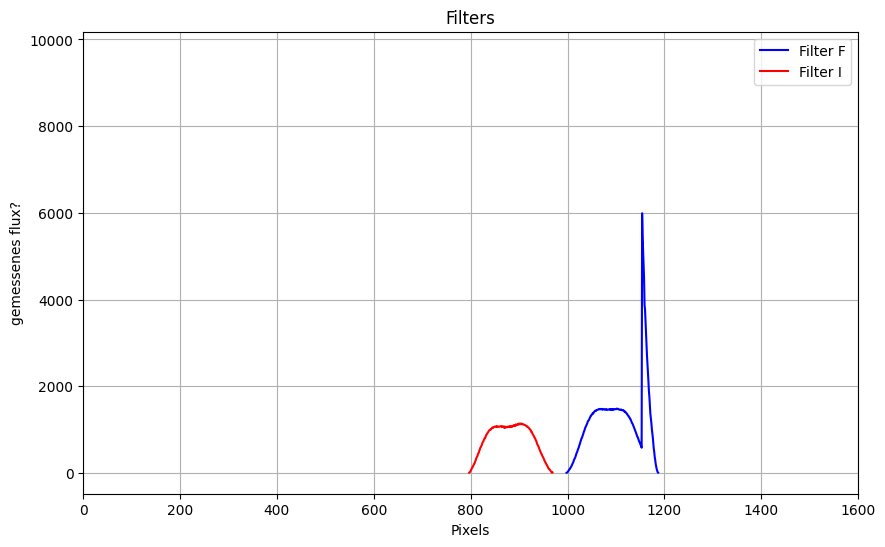

In [ ]:
FilterF=filterdata_images[0]
FilterI=filterdata_images[1]



values_correctedF=FilterF-avg_values_bias-avg_values_dark
values_flat_correctedF=values_correctedF/(avg_values_flat/avg_flat)

values_correctedI=FilterI-avg_values_bias-avg_values_dark
values_flat_correctedI=values_correctedI/(avg_values_flat/avg_flat)


FilterF_cor=values_flat_correctedF[478:579]
FilterI_cor=values_flat_correctedI[478:579]

FilterF_cor[FilterF_cor < 0] = np.nan #sets all values that are negative in the row to nan so that they wont be summed up later
spectrum_F = np.nanmedian(FilterF_cor, axis=0) #sums up all values in a column I think and then calculates the mean 

FilterI_cor[FilterI_cor < 0] = np.nan #sets all values that are negative in the row to nan so that they wont be summed up later
spectrum_I = np.nanmedian(FilterI_cor, axis=0) #sums up all values in a column I think and then calculates the mean 


plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(x_values, spectrum_F, label='Filter F', color='blue')
plt.plot(x_values,spectrum_I,label='Filter I', color='red')
plt.xlabel('Pixels')  # Label for the x-axis
plt.ylabel('gemessenes flux?')  # Label for the y-axis
plt.xlim(0, 1600)
plt.title('Filters')  # Title of the plot
plt.legend()  # Show the legend
plt.grid()  # Optional: Add a grid for better readability
plt.show()

# Abschätzung des Signal-zu-Rausch-Verhältnisses im Th-Ar und Sonnenspektrum
# (3 Punkte) fehlt noch drunter:

# Einlesung der standard_extraterrestrial_spectrum.csv und amal darstellung

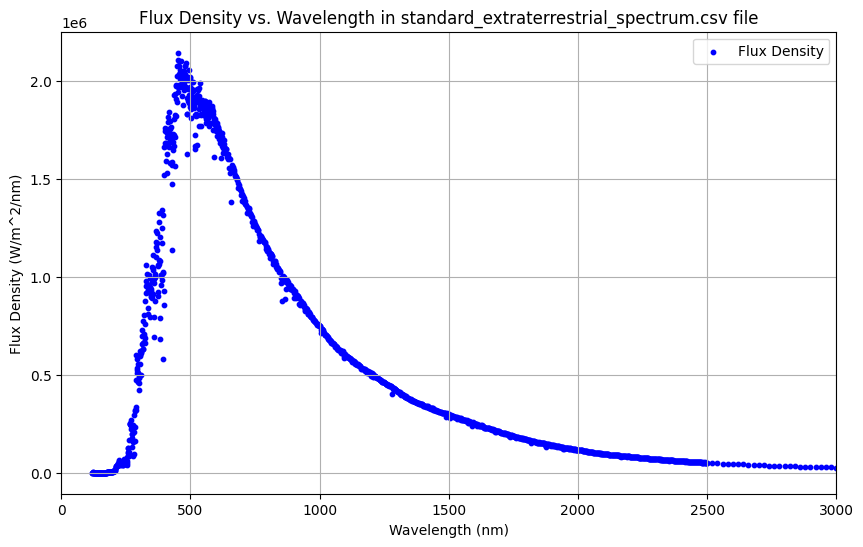

In [67]:
#no clue where we will need this tbh
#i am not sure if i did conversion from mikrom to nm correct i did both * 10**3


import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file, skipping the first row
file_path = 'standard_extraterrestrial_spectrum.csv'  # Replace with your actual file path
data = pd.read_csv(file_path, skiprows=1, header=None)  # Set header=None to treat the first row as data

# Extract the columns by index
wavelength = data[0]  # First column (index 0)
flux_density = data[1]  # Second column (index 1)

# Convert to numeric types (handling any non-numeric values)
wavelength = pd.to_numeric(wavelength, errors='coerce')*10**3
flux_density = pd.to_numeric(flux_density, errors='coerce')*10**3

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.scatter(wavelength, flux_density, label='Flux Density', color='blue', s=10)  # s is the size of points
plt.xlabel('Wavelength (nm)')  # Label for the x-axis
plt.ylabel('Flux Density (W/m^2/nm)')  # Label for the y-axis
plt.title('Flux Density vs. Wavelength in standard_extraterrestrial_spectrum.csv file')  # Title of the plot
plt.legend()  # Show the legend
plt.grid()  # Optional: Add a grid for better readability

# Set the x-axis limits if needed (adjust as appropriate)
plt.xlim(0, 3000)  # Adjust the limits based on your data range

plt.show()  # Display the plot


# Einlesung der Spektrum.SSM file und darstellung in nm (hoffentlich richtig converted ^^)

C:\Users\raffi\AppData\Local\Temp\ipykernel_5152\2208676817.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, skiprows=1, header=None)


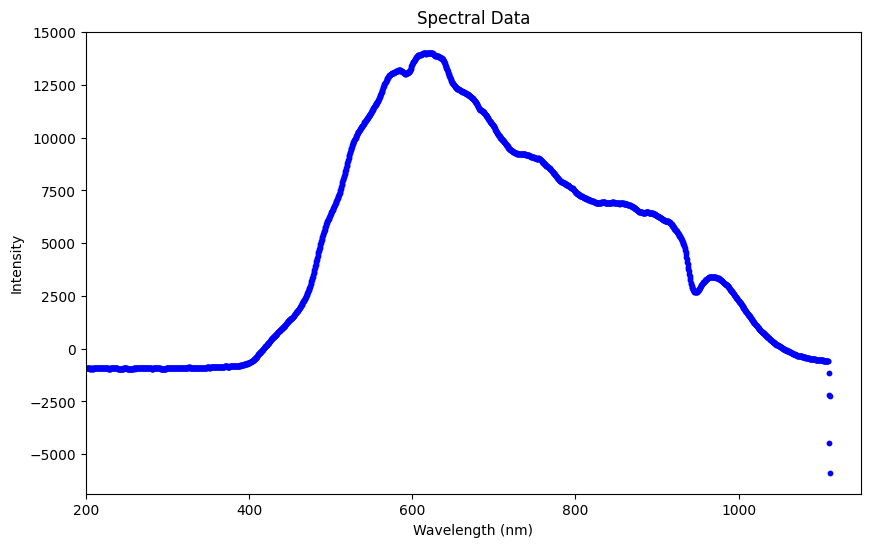

In [ ]:
#What this is you wonder? I have no fucking idea but we have it and there it is... is thsi the SilverNova Spektrograph data ???? Maybe who knows good naming convention calling it spektrum

import pandas as pd

# Define the file path
file_path = r'Spektrum.SSM'  # Use raw string to avoid issues with backslashes

data = pd.read_csv(file_path, delim_whitespace=True, skiprows=1, header=None)

data.columns = ['Wavelength (nm)', 'Intensity']

data['Wavelength (nm)'] = pd.to_numeric(data['Wavelength (nm)'], errors='coerce')
data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')


plt.figure(figsize=(10, 6))
plt.scatter(data['Wavelength (nm)'], data['Intensity'], color='blue', s=10)  # s is the size of points
plt.xlabel('Wavelength (nm)')
plt.xlim(200, 1150)  
plt.ylabel('Intensity')
plt.title('Spektrum.SSM file')
plt.show()


# Ab hier nur mehr hilfestellungsachen


## 2. Stacken, Extrahieren 1D Spektrum

Erstellung von gemittelten Aufnahmen zur Verbesserung des Signals und zum Zweck der Verwerfung von Ausreißern (z.B. Cosmics).

In [50]:
# Berechnung des Medians für jede Pixelsäule (z.B. für Masterbias)
data_median = np.nanmedian(data_images, axis=0)

NameError: name 'data_images' is not defined

Extraktion eines 1-dimensionalen Spektrums: Von den kalibrierten Aufnahmen kann ein 1-dimensionales Spektrum extrahiert werden, indem ein Rechteck an der passenden Stelle ausgeschnitten wird. Darauf folgend berechnet man den Median entlang einer Pixelsäule.

In [ ]:
# Ausschneiden eines Rechtecks, basierend auf Pixelkoordinaten
# Achten Sie auf die richtige Reihenfolge der x/y-Koordinaten!
data_cutout = data[100:250, 300:320]

# Alternativ entlang der gesamten x-Achse
data_cutout = data[100:250, :]

# Median entlang des Spalts für alle Pixel in Dispersionsrichtung
spectrum_flat = np.nanmedian(data_cutout, axis=0)

# Speichern als FITS-Tabelle
from astropy.table import Table
table = Table(data=[np.arange(len(spectrum_flat)), spectrum_flat], names=["Pixel", "Flux (ADU)"])
table.write("/path/to/table.fits")

## 3. Kombinierte Flat Korrektur

Idee: Das Flat das durch den Spektrographen aufgenommen wird enthält das Black-Body Spektrum der Tischlampe. Um dieses auszukorrigieren, nehmen wir ein zusätzliches Flat auf, das bereits korrigiert ist (Silva-Nova Spektrometer), durch welches das Spektrograph Flat dividiert werden soll. 

Dafür ist zu beachten dass das Wellenlängen-sampling der beiden Flats anders ist. Kontrollieren Sie nach in welchen Wellenlängbereichen die beiden Flats aufgenommen wurden. 

Tip: Mit Interpolieren (zB `interp1d`) kann man das erwünschte sampling für das Nova Spektrometer erhalten.

## 4. Wellenlängekalibration
Identifikation der ThAr-Linien. Zur Identifikation der Linien soll der beigelegte Linienatlas verwendet werden. Beachten Sie, dass das aufgenommene Spektrum Wellenlängen von 4200 bis 5500 abdeckt.

Für das finden der peaks kann zB von `scipy.signal` die funktion `find_peaks`verwendet werden.


Erstellung einer Wellenlängenkalibration auf Basis der identifizierten Linien. Hierfür erstellen Sie einen Fit zwischen Pixelkoordinaten und Wellenlänge der identifizierten Linien. Sie können hierfür numpy verwenden

In [ ]:
# Fit zwischen Pixel und Wellenlänge mittels Polynom 2. Ordnung
coeff = np.polynomial.Polynomial.fit(pixel, wavelength, 2)

NameError: name 'pixel' is not defined

Die so erstellte Interpolation kann nun verwendet werden, um die Wellenlängenkalibration auf das Sonnenspektrum anzuwenden.

## 5. Spektrale Auflösung

Bestimmung der spektralen Auflösung aus der Breite der ThAr-Linien. Die Auflösung eines Spektrographen ist definiert durch
$$
        R \equiv \frac{\lambda}{\Delta \lambda},
$$
wobei hier R die Auflösung des Spektrographen darstellt, $\lambda$ die beobachtete Wellenlänge und $\Delta \lambda$ den kleinsten Unterschied in der Wellenlänge, den der Spektrograph auflösen kann. In der Praxis kann man für $\Delta \lambda$ die Full Width Half Maximum (FWHM) einer Linie bestimmen.

## 6. Signal-to-Noise Ratio

Abschätzung des Signal-Rausch-Verhältnisses (S/N) des Sonnenspektrums. Das S/N bei Spektren ist wegen unterschiedlicher Linienstärke wellenlängenabhängig. Die Angabe eines einzelnen S/N-Wertes für ein gesamtes Spektrum ist daher meistens nicht aussagekräftig. Zur Vereinfachung nehmen Sie an, dass die dominierende Rauschkomponente das Signal selbst ist, d.h. das Rauschen folgt einer Poissonverteilung nur abhängig vom Signal (den Gain der Kamera finden Sie im FITS-Header).